In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/LENOVO/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/LENOVO/input\metadata.csv
C:/Users/LENOVO/input\sample_submission.csv
C:/Users/LENOVO/input\faces_224\aaagqkcdis.jpg
C:/Users/LENOVO/input\faces_224\aaaoqepxnf.jpg
C:/Users/LENOVO/input\faces_224\aaavbjopeq.jpg
C:/Users/LENOVO/input\faces_224\aaavflklag.jpg
C:/Users/LENOVO/input\faces_224\aabdnomlru.jpg
C:/Users/LENOVO/input\faces_224\aabdogagch.jpg
C:/Users/LENOVO/input\faces_224\aabgnwnqba.jpg
C:/Users/LENOVO/input\faces_224\aabjfjbpir.jpg
C:/Users/LENOVO/input\faces_224\aabkwhhgwv.jpg
C:/Users/LENOVO/input\faces_224\aabmgfhcgg.jpg
C:/Users/LENOVO/input\faces_224\aabqcugcpc.jpg
C:/Users/LENOVO/input\faces_224\aabqyygbaa.jpg
C:/Users/LENOVO/input\faces_224\aabunyewgi.jpg
C:/Users/LENOVO/input\faces_224\aabuyfvwrh.jpg
C:/Users/LENOVO/input\faces_224\aabyjxwqyo.jpg
C:/Users/LENOVO/input\faces_224\aacehwwzol.jpg
C:/Users/LENOVO/input\faces_224\aacfuwiwjw.jpg
C:/Users/LENOVO/input\faces_224\aacmrrcpmr.jpg
C:/Users/LENOVO/input\faces_224\aacweweyzz.jpg
C:/Users/LENOVO/input\faces_

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



C:/Users/LENOVO/input\faces_224\yjywpiqrht.jpg
C:/Users/LENOVO/input\faces_224\yjzamvhcwq.jpg
C:/Users/LENOVO/input\faces_224\yjzapfbtoa.jpg
C:/Users/LENOVO/input\faces_224\yjzavgbujd.jpg
C:/Users/LENOVO/input\faces_224\yjzdaeizdr.jpg
C:/Users/LENOVO/input\faces_224\yjzgrighqo.jpg
C:/Users/LENOVO/input\faces_224\yjzgxsnpom.jpg
C:/Users/LENOVO/input\faces_224\yjzpjnxzoi.jpg
C:/Users/LENOVO/input\faces_224\ykajndzpnt.jpg
C:/Users/LENOVO/input\faces_224\ykanztkjlg.jpg
C:/Users/LENOVO/input\faces_224\ykawxlgqcu.jpg
C:/Users/LENOVO/input\faces_224\ykbbuvbqsn.jpg
C:/Users/LENOVO/input\faces_224\ykbfcijwgw.jpg
C:/Users/LENOVO/input\faces_224\ykbhmueovi.jpg
C:/Users/LENOVO/input\faces_224\ykbingkwma.jpg
C:/Users/LENOVO/input\faces_224\ykbinjkdud.jpg
C:/Users/LENOVO/input\faces_224\ykbmdulxnz.jpg
C:/Users/LENOVO/input\faces_224\ykccbybjcj.jpg
C:/Users/LENOVO/input\faces_224\ykcvazqzpo.jpg
C:/Users/LENOVO/input\faces_224\ykcydkochm.jpg
C:/Users/LENOVO/input\faces_224\ykdbemyzig.jpg
C:/Users/LENO

In [3]:
dataset_path = 'C:/Users/LENOVO/input/metadata.csv'
df = pd.read_csv(dataset_path)

In [4]:
df.head()

videoname  original_width  original_height label        original
0  aznyksihgl.mp4             129              129  FAKE  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129  FAKE  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217  FAKE  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186  FAKE  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155  FAKE  pluadmqqta.mp4

In [5]:
df.tail()
df.shape

(95634, 5)

In [6]:
df.columns

Index(['videoname', 'original_width', 'original_height', 'label', 'original'], dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

videoname              0
original_width         0
original_height        0
label                  0
original           16293
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95634 entries, 0 to 95633
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   videoname        95634 non-null  object
 1   original_width   95634 non-null  int64 
 2   original_height  95634 non-null  int64 
 3   label            95634 non-null  object
 4   original         79341 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [10]:
df.nunique()

videoname          95634
original_width        31
original_height       34
label                  2
original           16955
dtype: int64

In [11]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['videoname', 'label', 'original'], dtype='object')

Numerical type columns:
Index(['original_width', 'original_height'], dtype='object')


In [12]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [13]:
categorical,non_categorical, discrete, continuous = classify_features(df)

In [14]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['label']
Non-Categorical Features: ['videoname', 'original']
Discrete Features: []
Continuous Features: ['original_width', 'original_height']


In [15]:
df = df.fillna("Not Available")

In [16]:
for i in categorical:
    print(i,':', df[i].unique())
    print()

label : ['FAKE' 'REAL']



In [17]:
for i in categorical:
    print(df[i].value_counts())
    print()

label
FAKE    79341
REAL    16293
Name: count, dtype: int64



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings('ignore')

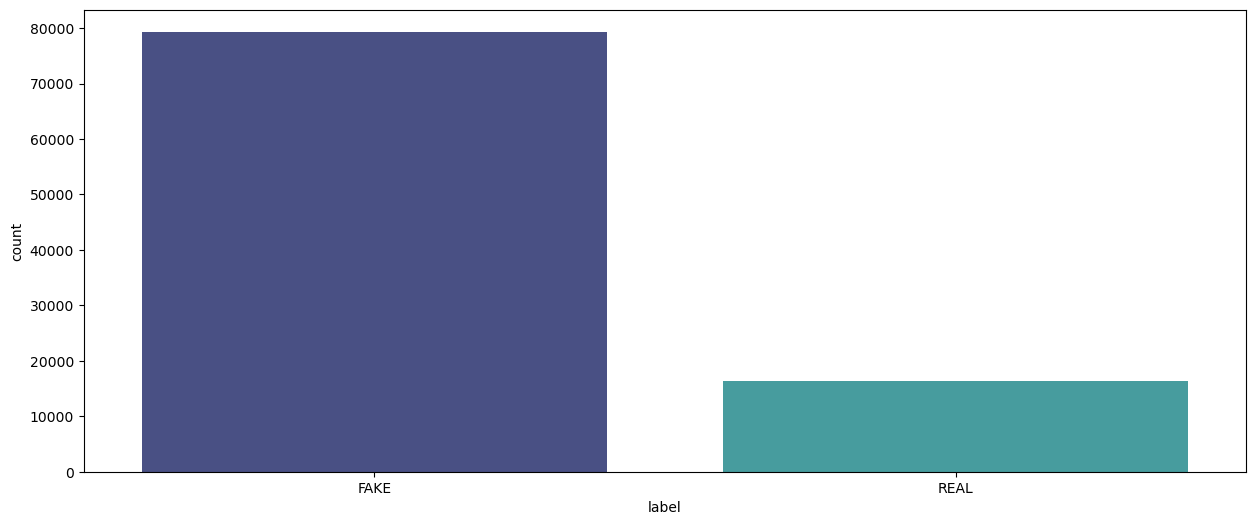

In [20]:
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(x = df[i], data = df, palette = 'mako')
    plt.show()

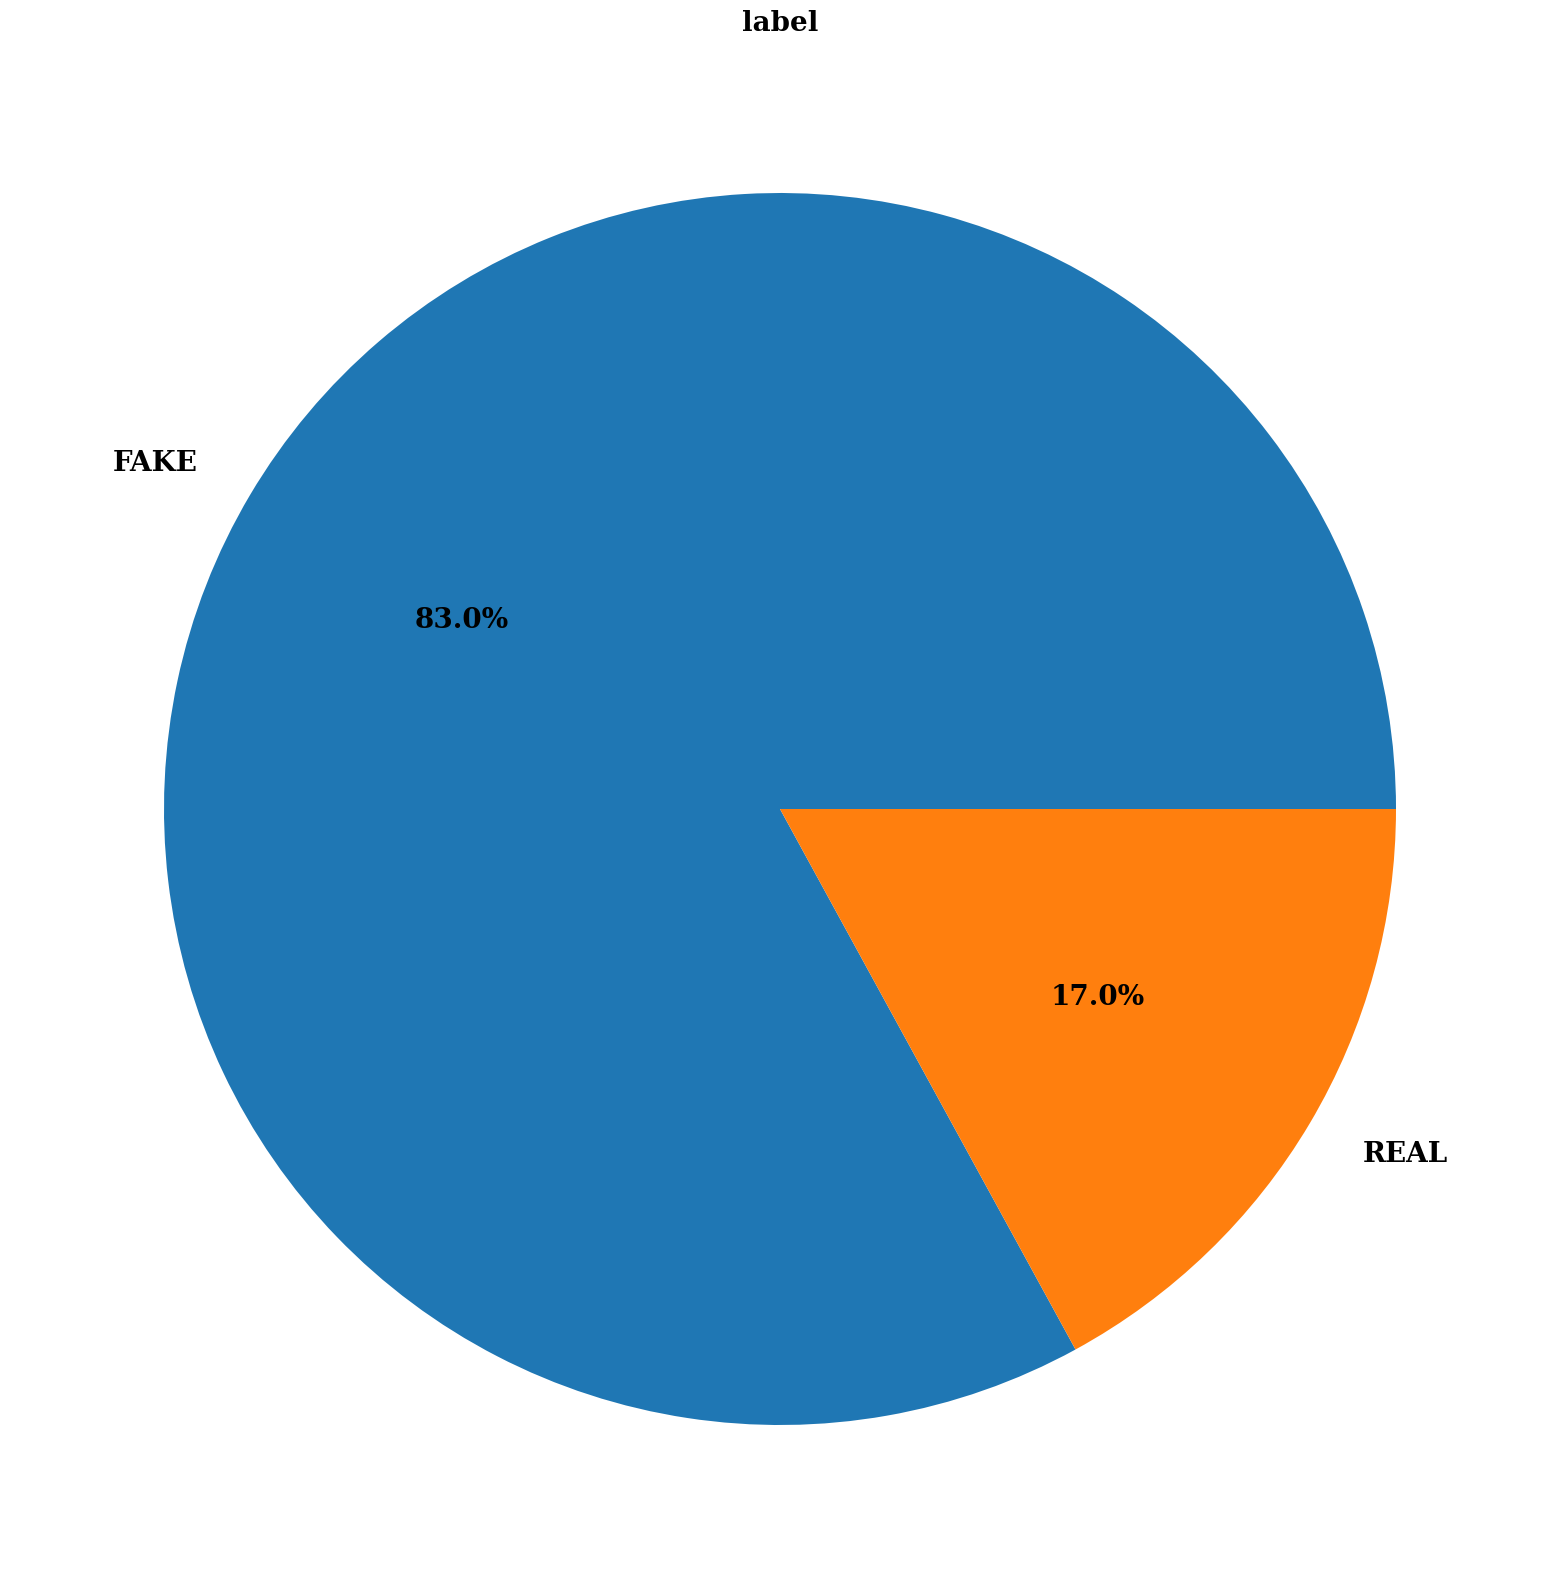

In [21]:
for i in categorical:
    plt.figure(figsize=(30,20))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,
            autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont)
    plt.show()

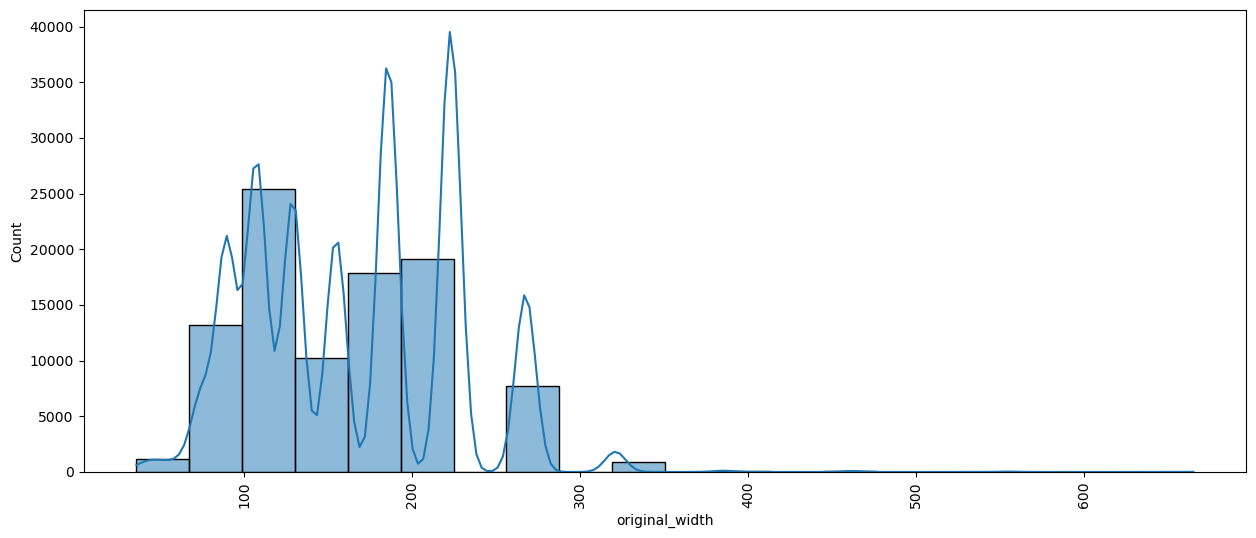

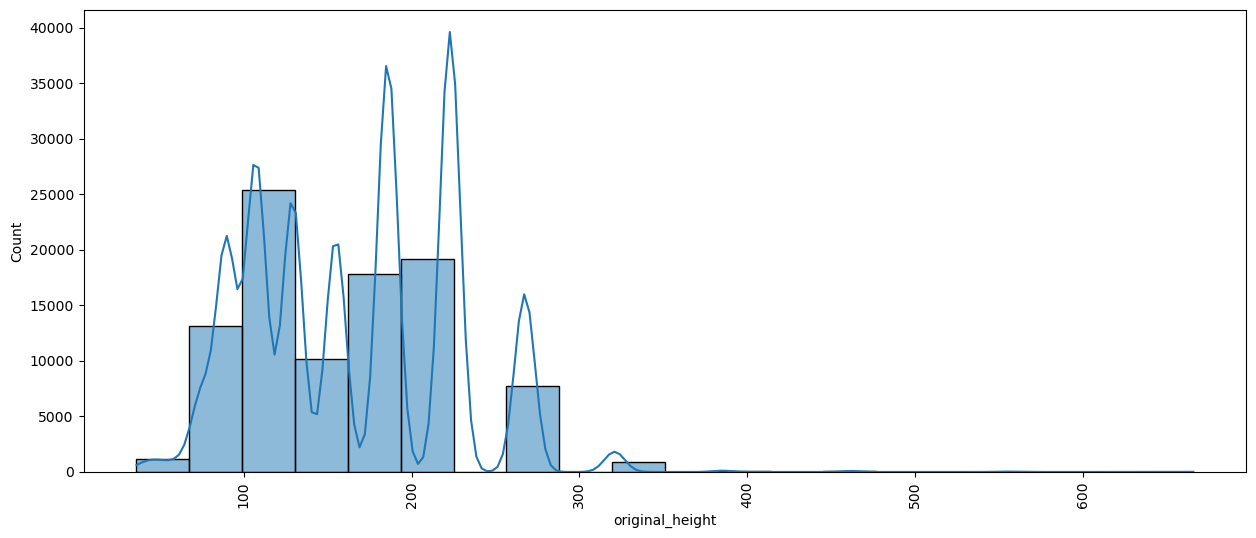

In [22]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'mako')
    plt.xticks(rotation = 90)
    plt.show()

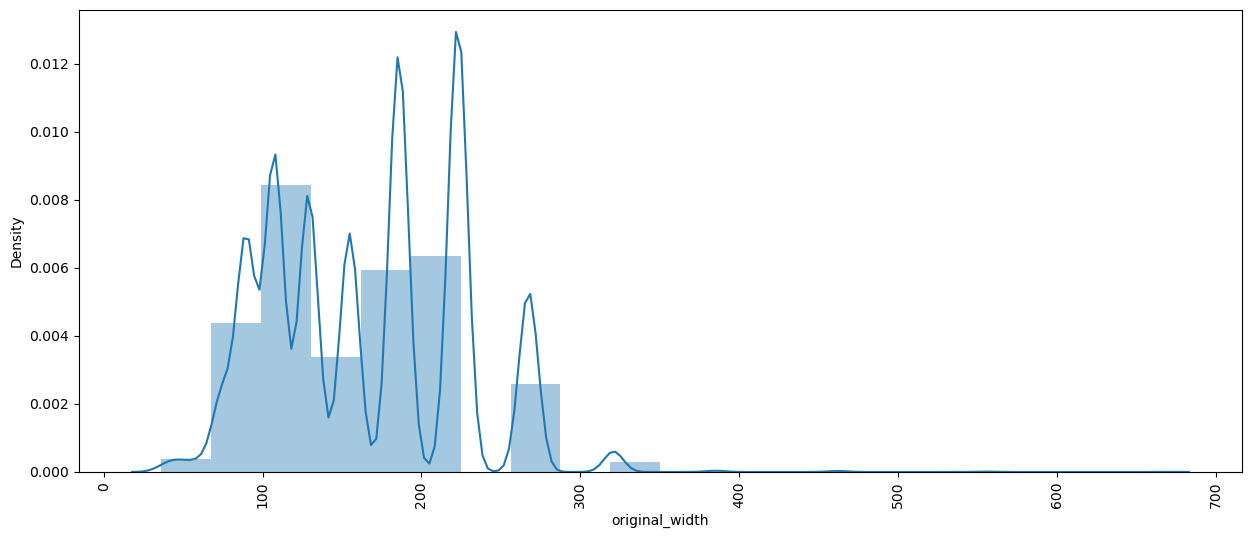

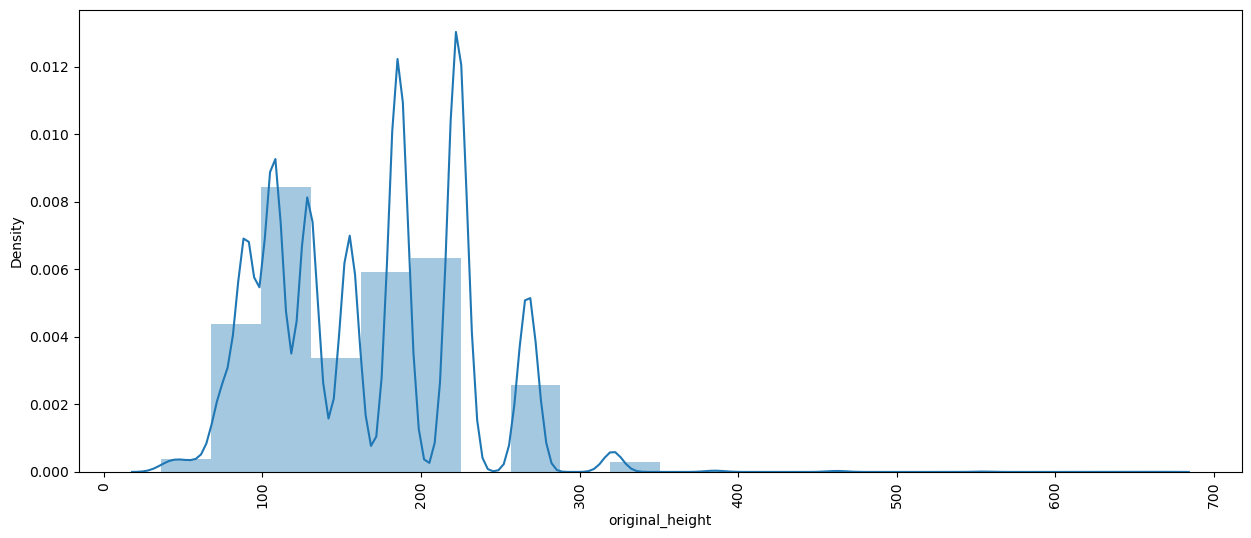

In [23]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 90)
    plt.show()

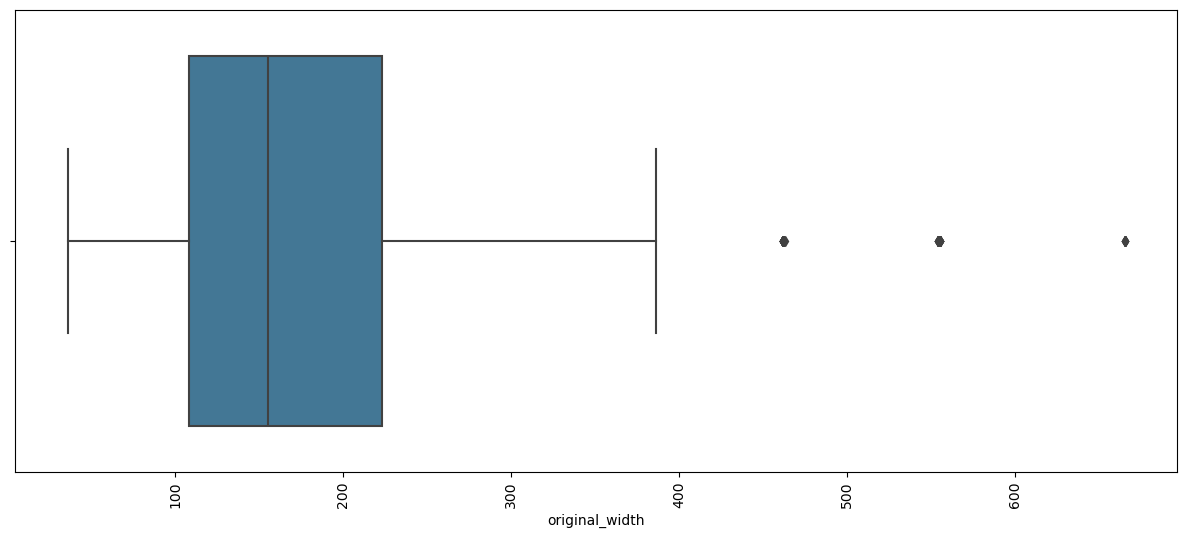

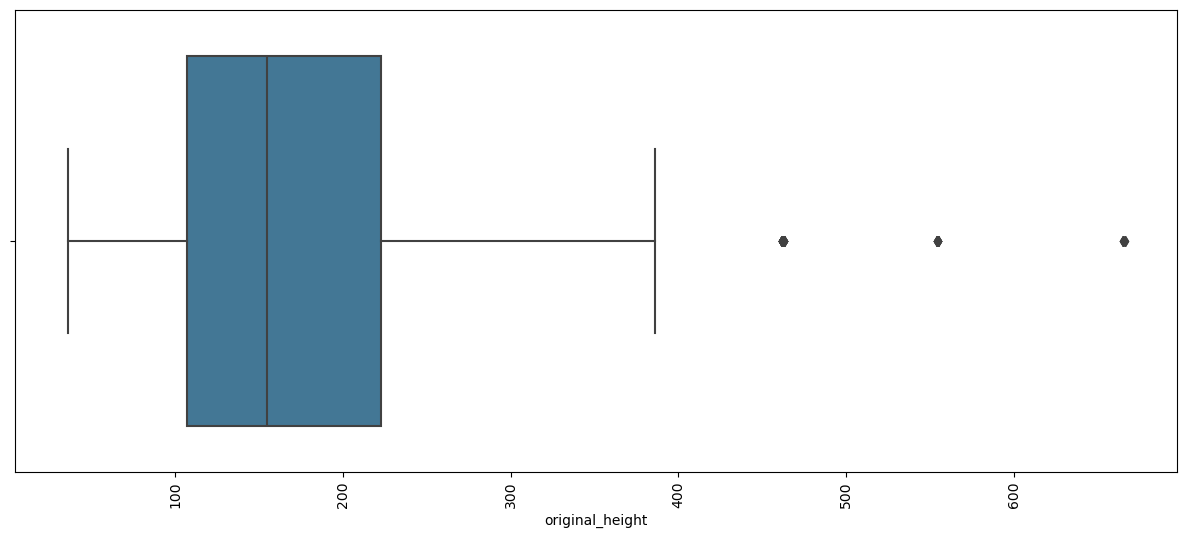

In [24]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df[i],data = df, palette = 'mako')
    plt.xticks(rotation = 90)
    plt.show()

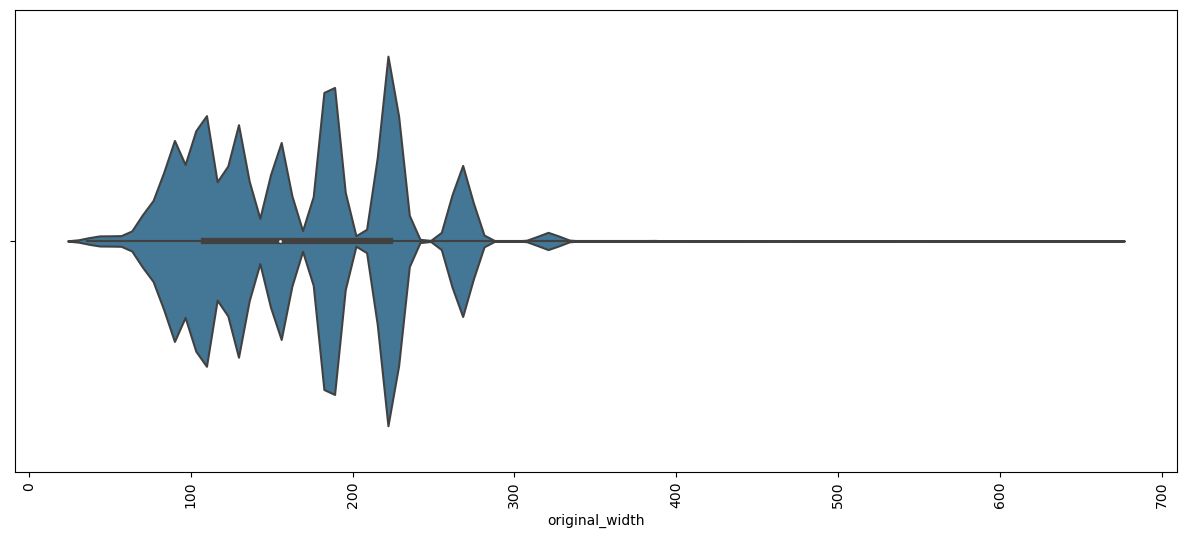

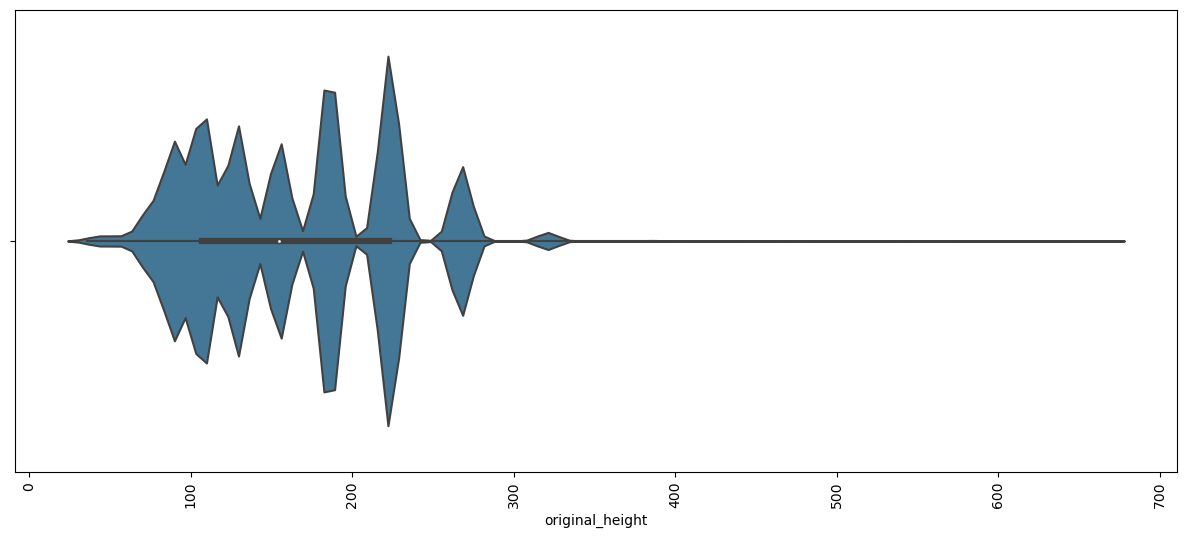

In [25]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x = df[i],data = df, palette = 'mako')
    plt.xticks(rotation = 90)
    plt.show()

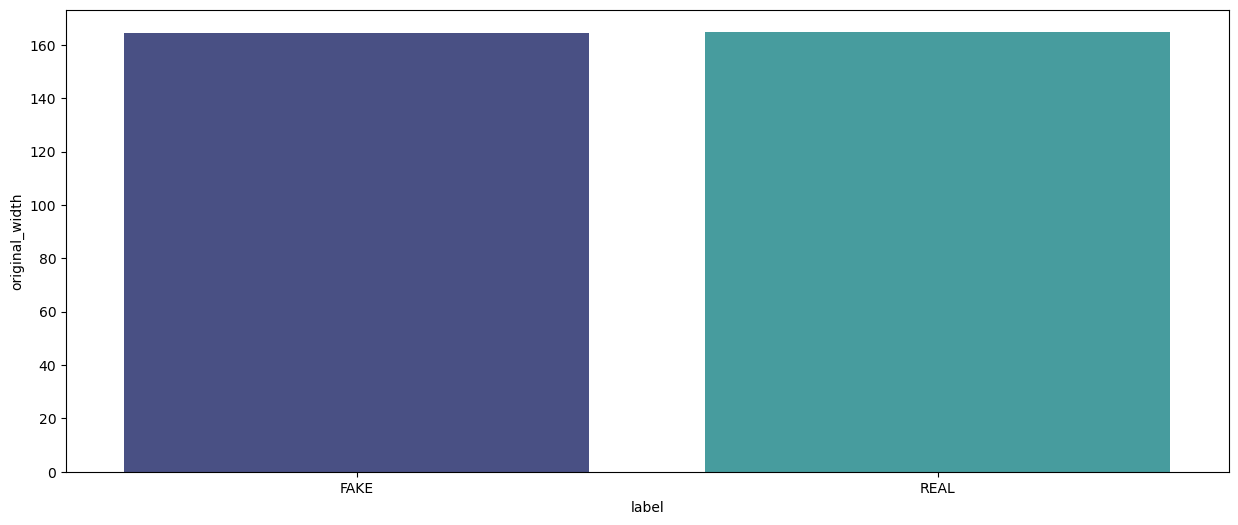

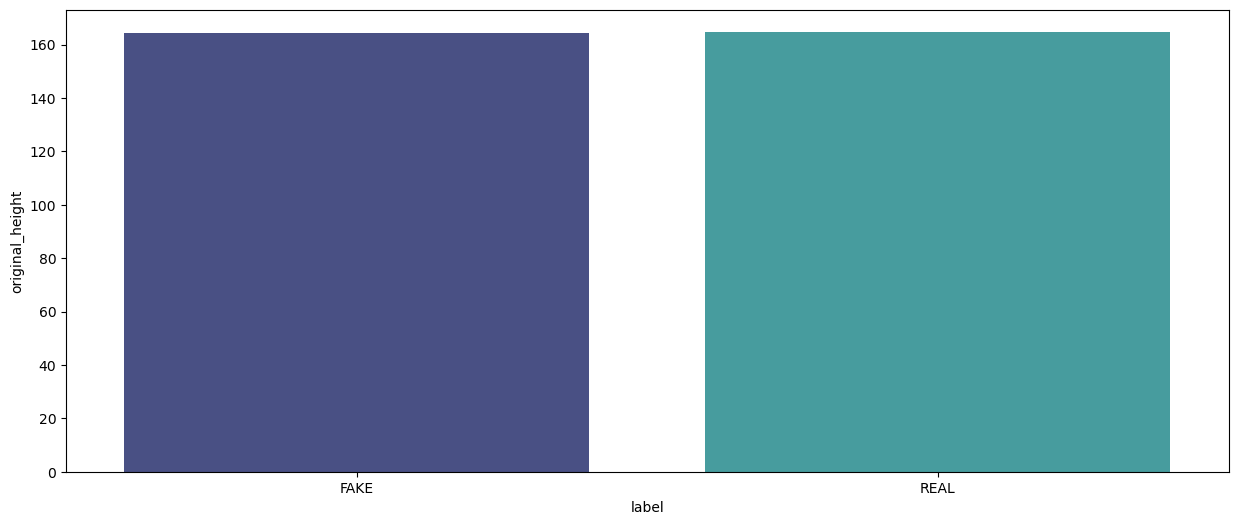

In [26]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x = df[i], y = df[j], data = df, ci = None, palette = 'mako')
        plt.show()

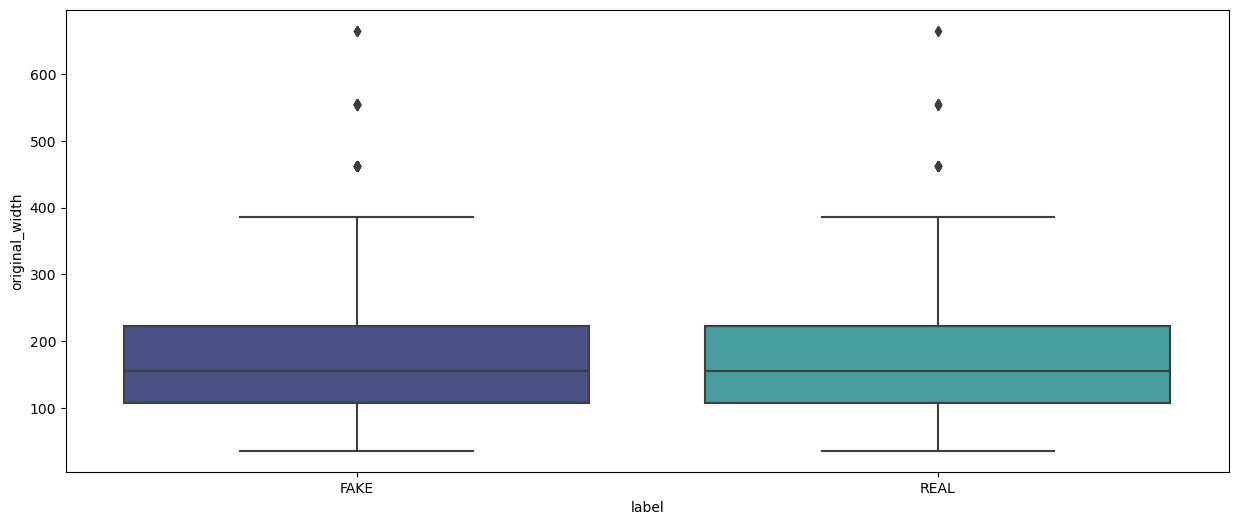

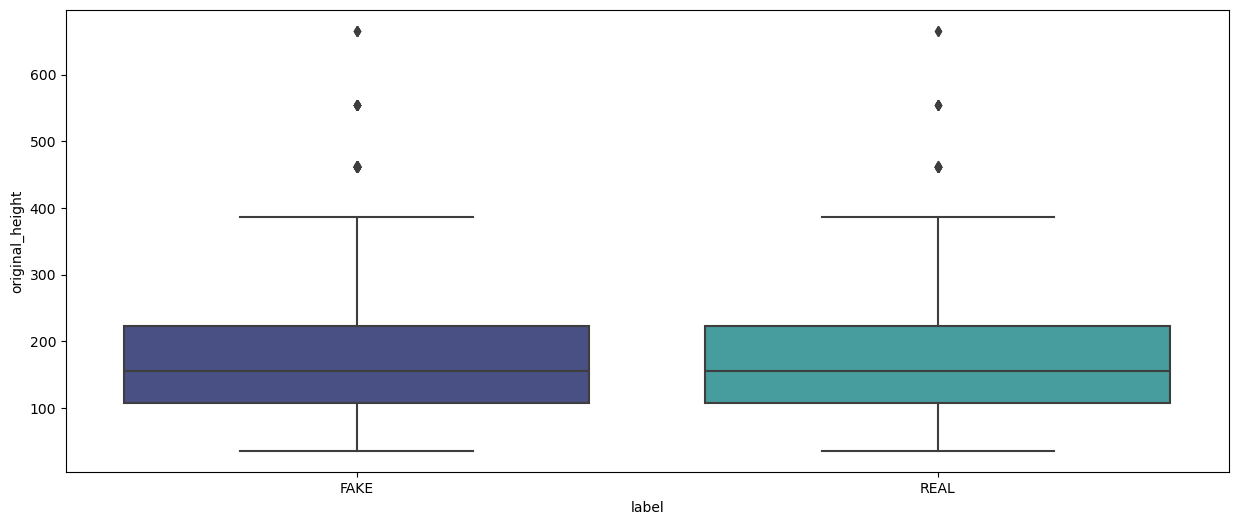

In [27]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x = df[i], y = df[j], data = df, palette = 'mako')
        plt.show()

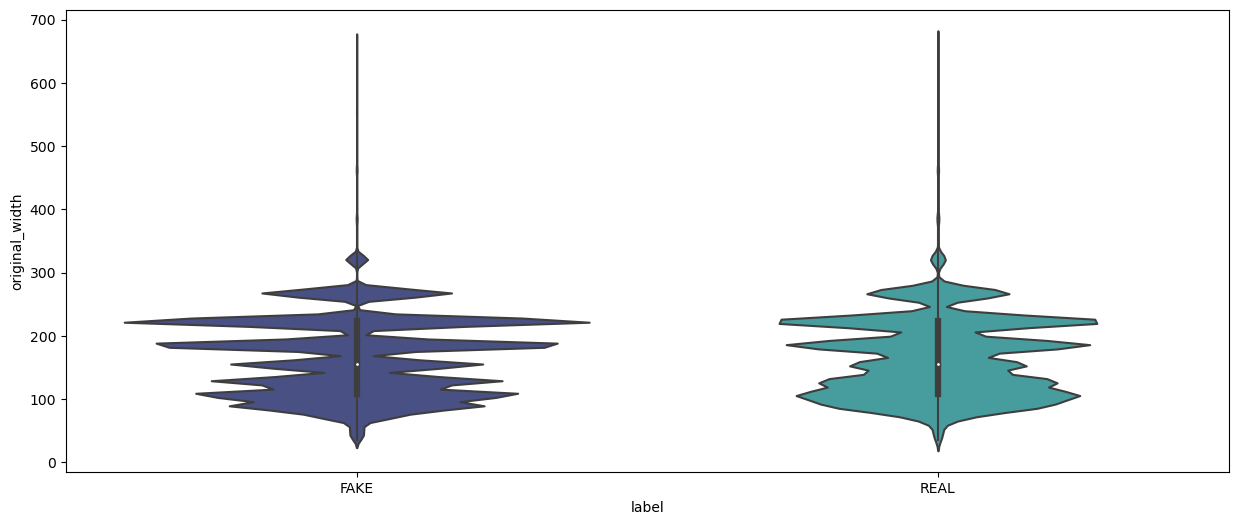

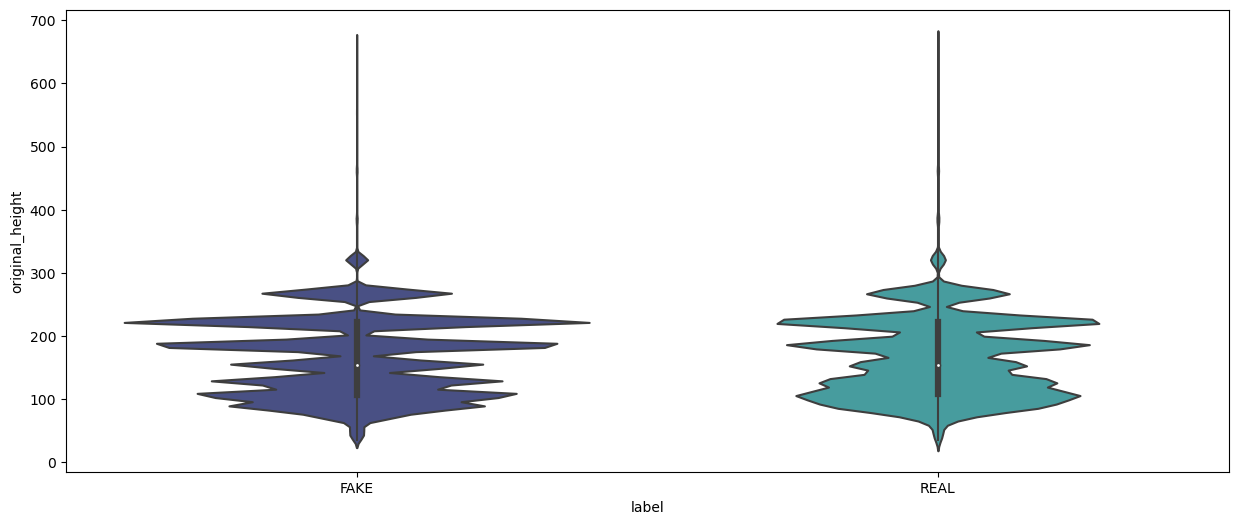

In [28]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.violinplot(x = df[i], y = df[j], data = df, palette = 'mako')
        plt.show()

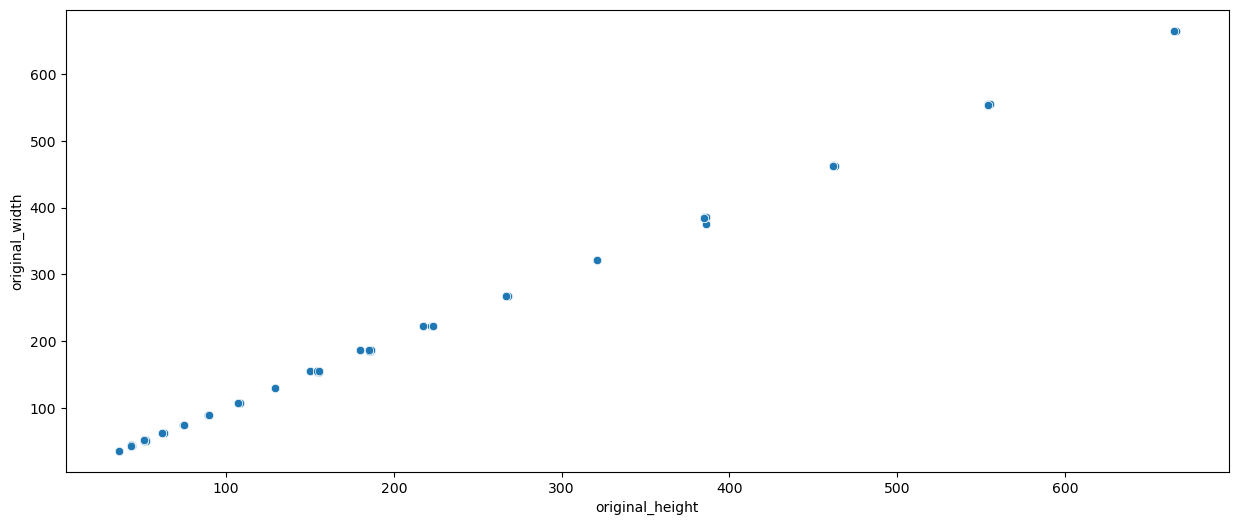

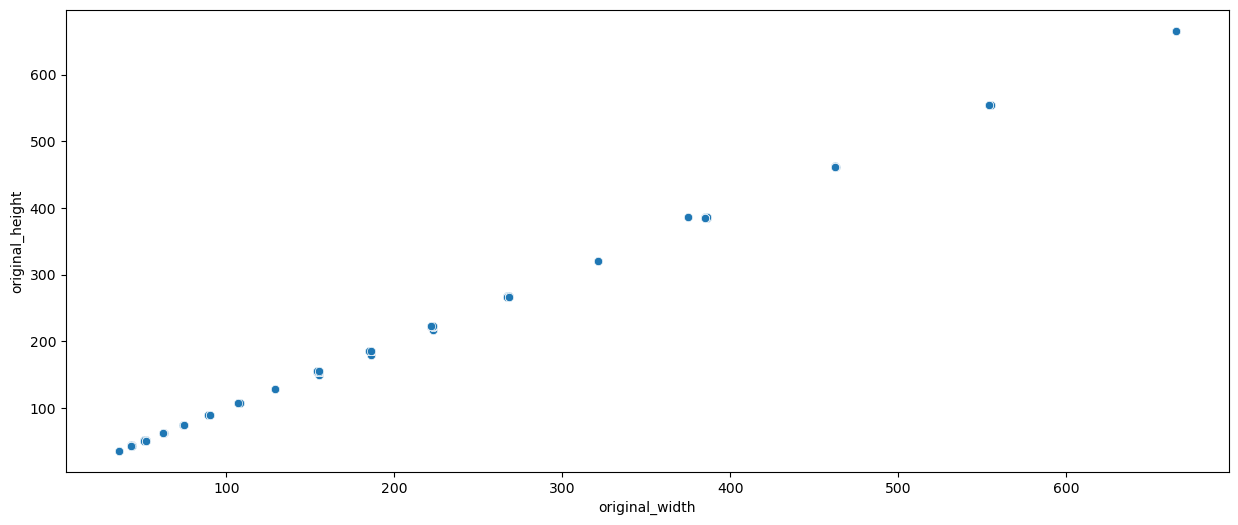

In [29]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[j], y = df[i], data = df, palette = 'mako')
            plt.show()

In [30]:
real_df = df[df["label"] == "REAL"]
fake_df = df[df["label"] == "FAKE"]
sample_size = 10000

real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

In [31]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [32]:
Train_set.shape,Val_set.shape,Test_set.shape

((11200, 5), (4800, 5), (4000, 5))

In [33]:
import cv2

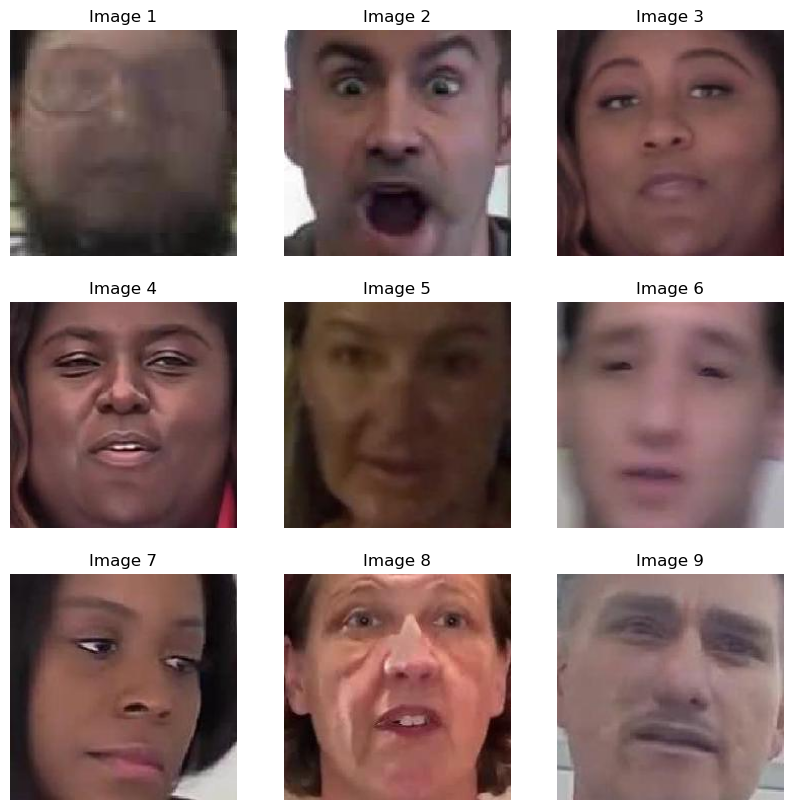

In [34]:
image_path = 'C:/Users/LENOVO/input/faces_224'

image_files = os.listdir(image_path)

image_files.sort()

selected_images = image_files[:9]

plt.figure(figsize=(10, 10))

for index, image_file in enumerate(selected_images):
    image = cv2.imread(os.path.join(image_path, image_file))

    plt.subplot(3, 3, index + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {index + 1}')
    plt.axis('off')

plt.show()

In [35]:
for i, image_file in enumerate(image_files[:10]):
    image = cv2.imread(os.path.join(image_path, image_file))
    if image is not None:
        height, width, _ = image.shape
        print(f"Resolution of image {i+1}: {width} x {height}")
    else:
        print(f"Error reading image {i+1}")

if len(image_files) < 10:
    print(f"Only {len(image_files)} images found in the directory.")

Resolution of image 1: 224 x 224
Resolution of image 2: 224 x 224
Resolution of image 3: 224 x 224
Resolution of image 4: 224 x 224
Resolution of image 5: 224 x 224
Resolution of image 6: 224 x 224
Resolution of image 7: 224 x 224
Resolution of image 8: 224 x 224
Resolution of image 9: 224 x 224
Resolution of image 10: 224 x 224


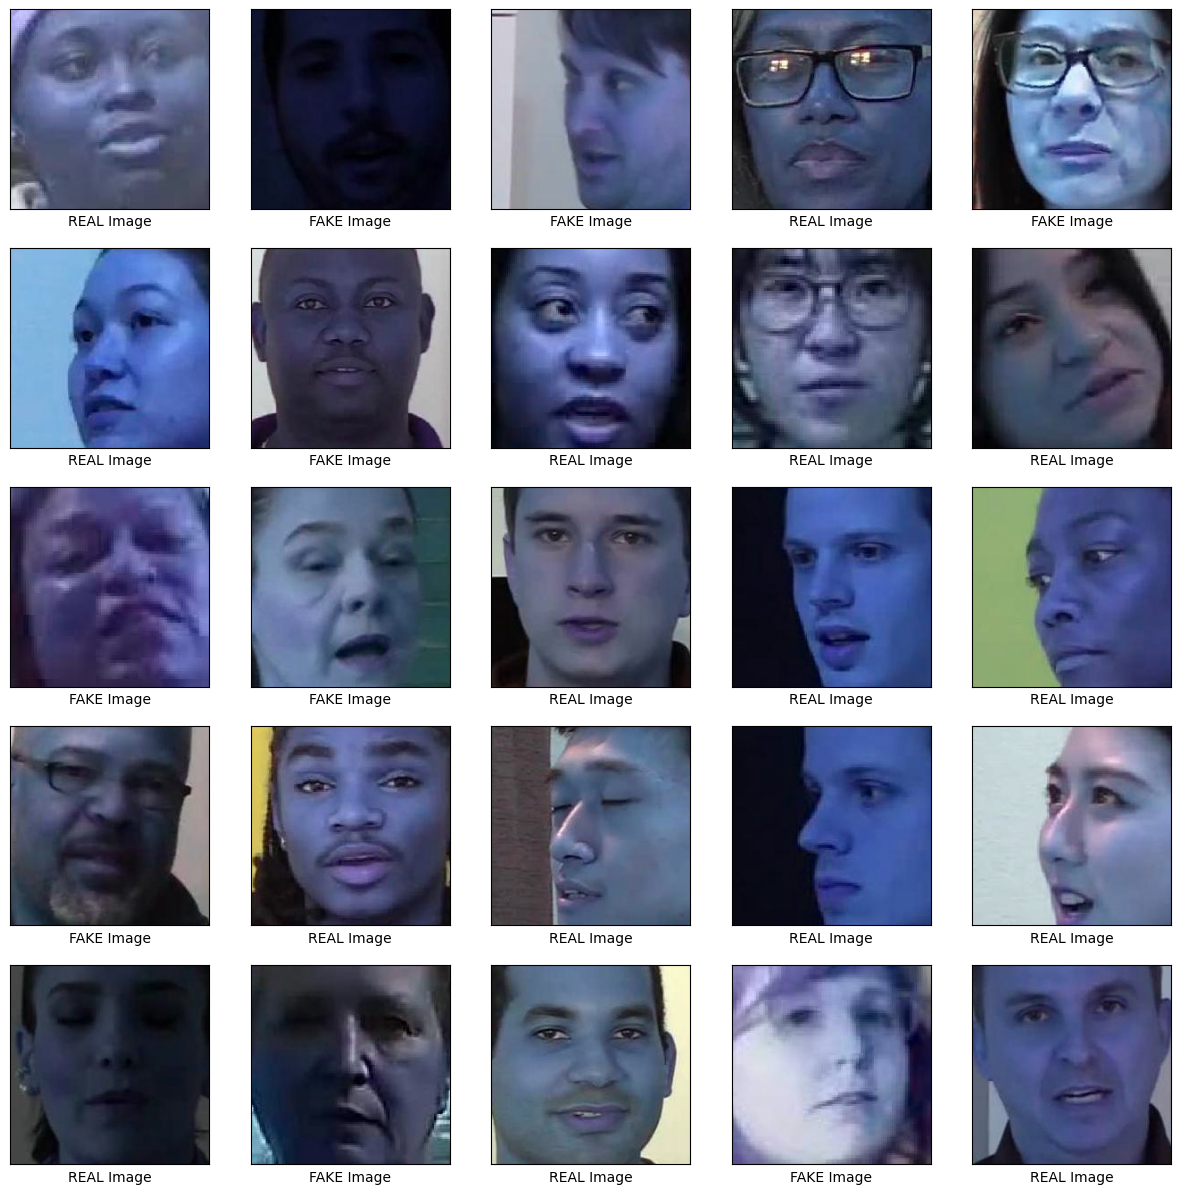

In [36]:
plt.figure(figsize=(15,15))
for cur,i in enumerate(Train_set.index[25:50]):
    plt.subplot(5,5,cur+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(cv2.imread('C:/Users/LENOVO/input/faces_224/'+Train_set.loc[i,'videoname'][:-4]+'.jpg'))

    if(Train_set.loc[i,'label']=='FAKE'):
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')

plt.show()

In [37]:
def retreive_dataset(set_name):
    images,labels=[],[]
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        images.append(cv2.imread('C:/Users/LENOVO/input/faces_224/'+img[:-4]+'.jpg'))
        if(imclass=='FAKE'):
            labels.append(1)
        else:
            labels.append(0)

    return np.array(images),np.array(labels)

In [38]:
X_train,y_train=retreive_dataset(Train_set)
X_val,y_val=retreive_dataset(Val_set)
X_test,y_test=retreive_dataset(Test_set)

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models
from functools import partial

In [40]:
tf.random.set_seed(42)

In [41]:
DefaultConv2D = partial(layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

# Model Definition
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid")
])

In [42]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0

In [50]:
history = model.fit(
    X_train, y_train,
    epochs=7,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val, y_val),
    verbose=1
)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
f1 = f1_score(y_test, y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_test_pred_binary)
print(f"Recall: {recall:.4f}")

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
import scikitplot as skplt

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()

In [ ]:
class_report = classification_report(y_test, y_test_pred_binary)
print("Classification Report:")
print(class_report)

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
input_shape = (224, 224, 3)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_resnet50 = models.Sequential()
model_resnet50.add(base_model)
model_resnet50.add(layers.GlobalAveragePooling2D())
model_resnet50.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_resnet50.summary()

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model_resnet50.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_resnet50.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    verbose=1
)

In [ ]:
y_pred = model_resnet50.predict(X_test)

In [ ]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
y_train_pred = model_resnet50.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
f1 = f1_score(y_test, y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_test_pred_binary)
print(f"Recall: {recall:.4f}")

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()

In [ ]:
class_report = classification_report(y_test, y_test_pred_binary)
print("Classification Report:")
print(class_report)

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
 try:
# Currently, memory growth needs to be the same across GPUs
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
 except RuntimeError as e:
# Memory growth must be set before GPUs have been initialized
  print(e)

Physical devices cannot be modified after being initialized
